In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A collection of vectors is called a SET.<br>
Vector sets are indicated using capital italics letters like $S$ and $V$.

Mathematically, sets can be described as follows:

$V = \{v_1,\dots,v_n\}$

Vector sets can contain a finite or an infinite number of vectors. <br>
Vector subspaces are infinite vector sets and have major implications for fitting statistical models to data.<br>
Vector sets can also be empty, and are indicated as $V=\{\}$<br>
Empty vector sets will be encountered when learning about matrix spaces.

Linear Weighted Combination
A linear weighted combination is a way of mixing information from multiple variables, with some variables contributing more than others. This fundamental operation is also sometimes called 'linear mixture' or 'weighted combination'. The word coefficient is used instead of weight.

Linear weighted combination simply means scalar-vector multiplication and addition: take some set of vectors, multiply each vector by a scalar, and add them to produce a single vector.

$\bar{w} = \lambda_1 v_1 + \lambda_2 v_2 + \dots + \lambda_n v_n$

It is assumed that all vectors $v_i$ have the same dimensionality; otherwise the addition is invalid. The $\lambda s$ can be any real number, including zero.

In [ ]:
l1,l2,l3 = 1,2,-3
v1,v2,v3 = np.array([4,5,6]),np.array([-4,0,-4]),np.array([1,3,2])
print(l1*v1+ l2*v2+l3*v3)

[-7 -4 -8]


Storing each vector and each coefficient as separate variables is tedious and does not scale up to larger problems. Therefore, in practice, linear weighted combinations are implemented via the compact and scalable matrix-vector multiplication method.

Linear weighted combinations have several applications.<br>
o  The predicted data from a statistical model are created by taking the linear weighted combination of regressors (predictor variables) and coefficients (scalars) that are computed via the least squares algorithm.

o  In dimension-reduction procedures such as principal component analysis, each component (sometimes called factor or mode) is derived as a linear weighted combination of the data channels, with the weights selected to maximize the variance of the component.

o  ANNs involve two operations: linear weighed combinations of the input data, followed by non-linear transformation. The weights are learned by minimizing a cost function, which is typically the difference between the model prediction and the real world target variable.

## Linear Independence

A set of vectors is linearly dependent if at least one vector in the set can be expressed as a linear weighed combination of other vectors in that set. A set of vectors is linearly independent if no vector can be expressed as a linear weighted combination of other vectors in the set.

$V =\biggl \{\begin{bmatrix} 1 \\ 3 \end{bmatrix},\begin{bmatrix} 2 \\ 7 \end{bmatrix}\biggr \}$
$\hspace{1cm} S = \biggl \{ \begin{bmatrix} 1 \\ 3 \end{bmatrix},\begin{bmatrix} 2 \\ 6 \end{bmatrix} \biggr \}$

Vector set $V$ is linearly independent: it is impossible to express one vector in the set as a linear multiple of the other vector in the set. That is to say, if we call the vectors in the set $v_1$ and $v_2$, then there is no possible scalar $\lambda$ for which $v_1=\lambda v_2$

However, $S$ is dependent, because we can use linear weighted combinations of some vectors in the set to obtain other vectors in the set. There is an infinite number of such combinations, two of which are $s_1 = .5*s_2$ and $s_2 = 2*s_1$

Here we have another vector set, $T$:

$T = \Biggl \{ \begin{bmatrix}8\\-4\\14\\6\end{bmatrix},\begin{bmatrix}4\\6\\0\\3\end{bmatrix} \begin{bmatrix}14\\2\\9\\7\end{bmatrix} \begin{bmatrix}13\\2\\9\\8\end{bmatrix} \Biggr \}$

Turns out this is in fact, linearly dependent- the sum of the first 3 vectors is twice the fourth vector.

So to determine linear independence, create a matrix from the vector set, compute the rank of the matrix, and compare the rank to the smaller number of rows or columns.

The main idea is that a set of vectors is linearly dependent if at least one vector in the set can be expressed as a linear weighted combination of the other vectors in the set, and a set of vectors is linearly independent if no vector can be expressed as a combination of other vectors.

Note: Independence is a property of a SET of vectors, that is a set of vectors can be linearly independent or linearly dependent; it is not a property of an individual vector within a set.


## Independence and the Zeros vector
Any vector set that includes the zeros vector is automatically linearly dependent. Any scalar multiple of the zeros vector is still the zeros vector, so the definition of linear dependence is always satisfied.

$\lambda_0 0 = 0 v_1 + 0 v_2 + 0 v_n$

as long as $\lambda_0 \neq 0$, we have a nontrivial solution, and the set fits with the definition of linear dependence

## Subspace and Span
A subspace encompasses all the infinite possible ways to linearly combine the vectors in a linearly independent set.

That is, for some finite set of vectors, the infinite number of ways to linearly combine them- using the same vectors but different numerical values for the weights- creates a vector subspace, and the mechanism of combining all possible linear weighted combinations is called the span of the vector set.

we'll start with a simple example of a vector set containing one vector:

$V = \Biggl \{ \begin{bmatrix}1\\3\end{bmatrix} \Biggr \}$

the span of this vector is the infinity of vectors that can be created as linear combinations of the vectors in the set. For a set with one vector, that simply means all possible scaled versions of the vector. Below figure shows the vector and the subspace it spans. Consider that any vector in the grey dashed line can be formed as some scaled version of the vector.

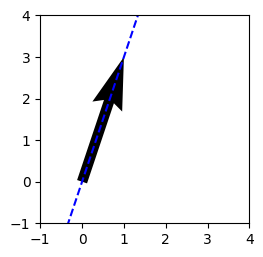

In [ ]:
#the vector
a = np.array([1,3])

#plotting the figure
fig,ax = plt.subplots(figsize=(2.7,2.7))
ax.quiver((0),(0),(a[0]),(a[1]),color='k',angles='xy',width=0.05,scale_units='xy',scale=1)
ax.set(xlim=(-1,4),ylim=(-1,4))
ax.plot((a[0]*-1,a[0]*2),(a[1]*-1,a[1]*2),ls='--',c='b')
plt.show()

Our next example is a set of two vectors in $\mathbb{R}^3$

$V = \Biggl \{\begin{bmatrix}1\\0\\2\end{bmatrix},\begin{bmatrix}-1\\1\\2\end{bmatrix}\Biggr \}$

The vectors are in $\mathbb{R}^3$, so they are graphically represented in a 3D axis. But the subspace that they span is a 2D plane in that 3D space. That plane passes through the origin, because scaling both vectors by zero gives the zeros vector.

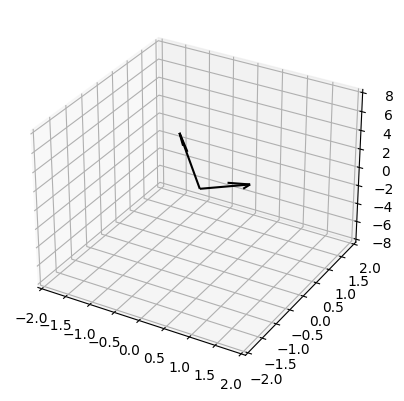

In [ ]:
a = np.array([1,0,2])
b = np.array([-1,1,2])
c = np.cross(a,b)
#(x,y,z).c = 0
#x.c1+y.c2+z.c3 = 0
#z = -x.c1-y.c2
xx,yy = np.meshgrid(np.arange(-3,3),np.arange(-3,3))
z = (-xx*c[0] -yy*c[1])/c[2]

#plotting
ax = plt.figure().add_subplot(projection='3d')
ax.quiver((0,0),(0,0),(0,0),(a[0],b[0]),(a[1],b[1]),(a[2],b[2]),color='k',pickradius=0.5)
ax.set(xlim=(-2,2),ylim=(-2,2),zlim=(-8,8))
ax.plot_surface(xx,yy,z,c)
plt.show()

## Cross product:
calculated as:

$a \times b = |a|.|b|.\sin\theta$

Note the $\sin\theta$, this indicates that the direction of the resultant vector flips when the angle passes 180 degrees or $\pi$ radians.

It can also be calculated as:

for two vectors $a = [a_x,a_y,a_z]$ and $b= [b_x,b_y,b_z]$, the cross product vector, $a\times b = c$ is calculated as:

$c_x = a_y*b_z - a_z*b_y $<br>
$c_y = a_z*b_x - a_x*b_z$<br>
$c_z = a_x*b_y - a_y*b_x$

## Subspace and Span continued
The first example had one vector and its span was a 1D subspace, and the second example had two vectors and their span was a 2D subspace. Consider:

$V = \Biggl \{ \begin{bmatrix}1\\1\\1\end{bmatrix},\begin{bmatrix}2\\2\\2\end{bmatrix} \Biggr \}$

Two vectors in $\mathbb{R}^3$, but the subspace that they span is still only a 1D subspace- a line. Its because on vector in the set is already in the span of the other vector. Thus, in terms of span, one of the two vectors is redundant.

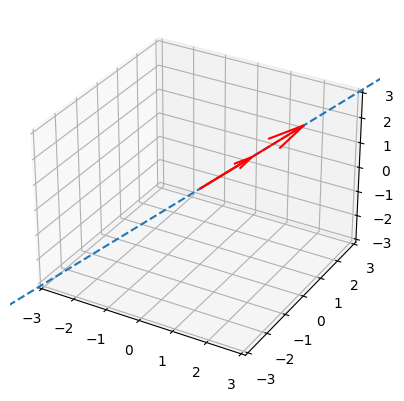

In [ ]:
a = np.array([1,1,1])
b = np.array([2,2,2])
xx = np.arange(-5,5)
yy = np.arange(-5,5)
z = xx

ax = plt.figure().add_subplot(projection='3d')
ax.quiver((0,0),(0,0),(0,0),(1,2),(1,2),(1,2),color='r')
ax.set(xlim=(-3,3),ylim=(-3,3),zlim=(-3,3))
ax.plot(xx,yy,z,ls='--')
plt.show()

So then, what is the relationship between the dimensionality of the spanned subspace and the number of vectors in the set? It has something to do with linear independence.

The dimensionality of the subspace spanned by a set of vectors is the smallest number of vectors that forms a linearly independent set. If a vector set is linearly independent, then the dimensionality of the subspace spanned by the vectors in that set equals the number of vectors in that set. If the set is dependent, then the dimensionality of the subspace spanned by those vectors is necessarily less than the number of vectors in that set.

The formal definition of a vector subspace is a subset that is closed under addition and scalar multiplication and includes the origin of the space. That means that any linear weighted combination of vectors in the subspace must also be in the same subspace, including setting all weights to zero to produce the zeros vectors at the origin of the space.

Note; it helps to think of span as a verb and subspace as a noun; a set of vectors spans, and the result of the spanning is the subspace.

## Basis
A basis is a set of rulers that you can use to describe the information in the matrix/data. you can describe the same data using different rulers, but some rulers are more convenient than others for solving certain problems.

The most common basis set is the cartesian axis: the familiar XY plane. We can write out the basis for the 2D and 3D cartesian graphs as follows:

$S_2 = \Bigg \{ \begin{bmatrix}1\\0\end{bmatrix},\begin{bmatrix}0\\1\end{bmatrix} \Biggr \} \hspace{1cm} S_3 = \Bigg \{ \begin{bmatrix}1\\0\\0\end{bmatrix},\begin{bmatrix}0\\1\\0\end{bmatrix},\begin{bmatrix}0\\0\\1\end{bmatrix} \Biggr \}$

Notice the cartesian basis sets comprise vectors that are mutually orthogonal and unit length. Those are great properties to have, and that why the cartesian basis sets are so ubiquitous. They're also called the Standard Basis Set.

But they're not the only basis sets. The following set is a different basis set for $\mathbb{R}_2$

$T = \Bigg \{ \begin{bmatrix}3\\1\end{bmatrix},\begin{bmatrix}-3\\1\end{bmatrix} \Biggr \}$

Basis set $S_2$ and $T$ both span the same subspace (all of $\mathbb{R}^2$.

Why would you prefer $T$ over $S$? Imagine we want to describe data points $p$ and $q$. We can describe those data points as their relationship to the origin-  that is their coordinates- using basis $S$ or $T$.

In basis $S$, those two coordinates are $p = (3,1)$ and $q = (-6,2)$. In linear algebra, we say that the points are expressed as the linear combinations of the basis vectors. In this case, the combination is $3s_1+1s_2$ for point $p$ and $-6s_1+2s_2$ for point $q$.

Now we can describe those points in basis $T$. As coordinates, we have $p=(1,0)$ and $q=(0,2)$. And in terms of basis vectors, we have $1t_1+0t_2$ for point $p$ and $0t_1+2t_2$  for point $q$. In other words, $p=t_1$ and $q=2t_2$. Again the datapoints $p$ and $q$ are the same regardless of the basis set, but T provided a compact and orthogonal description.

Bases are extremely important in data science and machine learning. Many problems in linear algebra can be conceptualized as finding the best set of basis vectors to describe some subspace. Dimension reduction, feature extraction, principal components analysis, linear discriminant analysis, factor analysis, singular value decomposition, image approximation, and data compression. All these analyses are essentially ways of identifying optimal basis vectors for a specific problem.

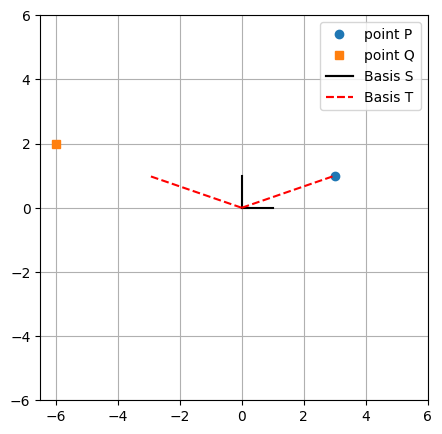

In [ ]:
p = np.array([3,1])
q = np.array([-6,2])


fig,ax = plt.subplots(figsize=(5,5))
p,=ax.plot(p[0],p[1],marker='o',ls='',label='point p')
q,=ax.plot(q[0],q[1],marker='s',ls='',label='point q')
Sx, = ax.plot([0,0],[0,1],ls='-',c='k')
Sy, = ax.plot([0,1],[0,0],ls='-',c='k')
T, = ax.plot([0,3],[0,1],ls='--',c='r')
U, = ax.plot([0,-3],[0,1],ls='--',c='r')
ax.set(xlim=(-6.5,6),ylim=(-6,6))
ax.grid()
ax.legend([p,q,(Sx,Sy),(T,U)],['point P','point Q','Basis S','Basis T'])
plt.show()

The figure in the book shows three distinct bases: <br>
The 'Standard Basis Set', corresponding to the x = 0 and y=0 lines, and basis sets defined via a principal components analysis, and an independent components analysis.
Which is better to describe the data? no basis is intrinsically better or worse; different basis sets can be more or less helpful for specific problems based on the goals of the analysis, the features of the data, constraints imposed by the analyses and so on.

## Definition of Basis
Basis is simply the combination of span and independence: a set of vectors can be a basis for some subspace if it (1) spans that subspace, and (2) is an independent set of vectors.

The basis needs to span the subspace for it to be used as a basis for that subspace, because you cannot describe something that you cannot measure. So a set of vectors cannot form the basis for any subspace beyond what it spans. So a basis needs to span the space that it's used for.

But why does a basis set require linear independence? The reason is that any given vector in the subspace must have a unique coordinate using that basis. Lets imagine describing point $p$ from the above figure using the following vector set:

$U = \Biggl \{ \begin{bmatrix}0\\1\end{bmatrix},\begin{bmatrix}0\\2\end{bmatrix},\begin{bmatrix}1\\0\end{bmatrix} \Biggr \}$

$U$ is a perfectly valid vector set, but is not a basis set. Why not?

What linear weighted combination describes point $p$ in st $U$? Well the coefficients for the linear weighted combination of the three vectors in $U$ could be (3,0,1) or (0,1.5,1). It's confusing, so mathematicians decided that a vector must have unique coordinates within a basis set. Linear independence guarantees uniqueness.<br>

point $p$ can be described using an infinite number of basis sets. So the measurement is not unique in terms of the plethora of possible basis sets. But within a basis set, a point is defined by exactly one linear weighted combination.